In [1]:
import dataset as ds
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gp
import rasterio
import rasterio.plot
from rasterio import features
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotter

In [2]:
csv_pth = './hennepin_bbox.csv'
shp_pth = './hennepin_county_parcels/hennepin_county_parcels.shp'
root_dir = './image_set/'

dataset = ds.HennepinDataset(csv_pth, shp_pth, root_dir)
print( len(dataset))


1320


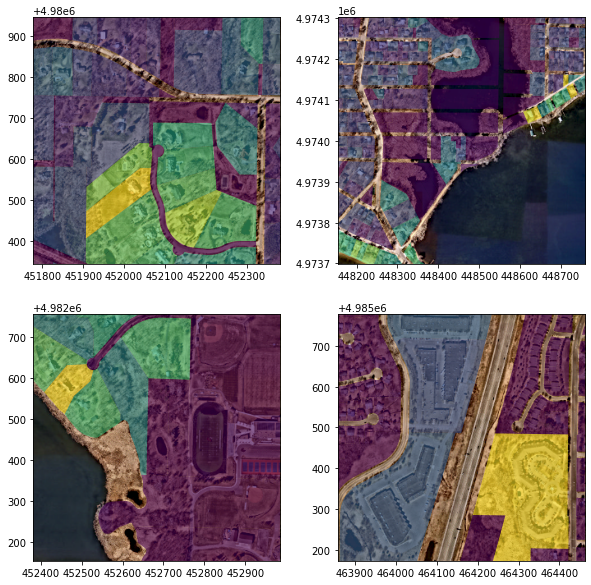

In [3]:
fig,axs = plt.subplots(2, 2, figsize = (10,10))
axs = axs.flatten()
for i in range(0,4):
    x = np.random.randint(len(dataset))
    gdf = dataset[x]['geometry']
    gdf.plot(column = 'TOTAL_MV1', ax = axs[i], alpha = 0.6, linewidth=3)
    #axs[i].imshow(dataset[x]['image'], extent = dataset[x]['img_bbox'], origin = 'upper')
    plotter.plot_tile(axs[i], dataset[x]['image'], extent = dataset[x]['img_bbox'])
fig.savefig('./Plots/tiles.jpg')

In [4]:
index = 345

poly_array = dataset[index]['geometry']
image = dataset[index]['image']
mv_array = dataset[index]['value']
img_bbox = dataset[index]['img_bbox']

(4979134.0, 4979738.0)


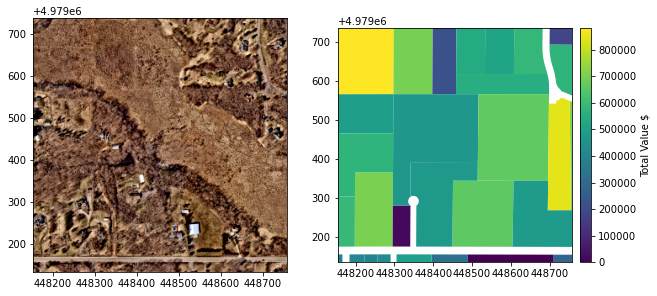

In [5]:
fig,axs = plt.subplots(1, 2, figsize = (10,8))
plotter.plot_tile(axs[0], image, extent = img_bbox)
axs[1].set_xlim( img_bbox[0:2] )
axs[1].set_ylim( img_bbox[2:4] )

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
poly_array.plot(column = 'TOTAL_MV1', ax = axs[1], alpha = 1, linewidth=3, legend = True, legend_kwds={'label': "Total Value $", 'orientation': "vertical"}, cax =cax)


print(img_bbox[2:4])

In [6]:
fig.savefig('./Plots/parcel.jpg')

<AxesSubplot:>

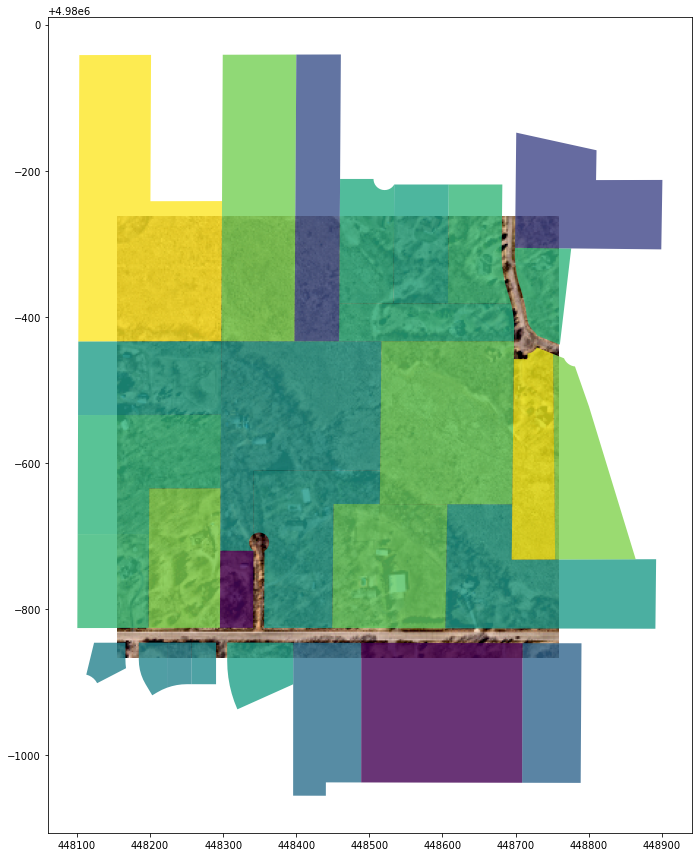

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(image, ax=ax, extent=img_bbox)
poly_array.plot(column = 'TOTAL_MV1', ax = ax, alpha = 0.8)

In [41]:
#normalize the values some
mv_array = mv_array / max(mv_array)

geom = poly_array['geometry'].to_frame().join(mv_array)

geom = [tuple(x) for x in geom.to_numpy()

[(<shapely.geometry.polygon.Polygon at 0x7f83cb81c2b0>, 1.0),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb81c748>, 0.5571913929784824),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb81cc50>, 0.79841449603624),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb81b128>, 0.6511891279728199),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb81b630>, 0.6681766704416761),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb81bb38>, 0.6489241223103058),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb7e9048>, 0.20951302378255945),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb7e9550>, 0.7904869762174406),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb7e9b00>, 0.24688561721404303),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb7e7080>, 0.6115515288788222),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb7e7550>, 0.5855039637599094),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb7e7a58>, 0.6670441676104191),
 (<shapely.geometry.polygon.Polygon at 0x7f83cb7e7f98>, 0.6251415628539071),
 (<shapely.geo

In [55]:
#transform = rasterio.transform.from_bounds(img_bbox[1],img_bbox[0], img_bbox[2], img_bbox[3], 302, 302 )

im = rasterio.features.rasterize(geom, out_shape = (302,302))

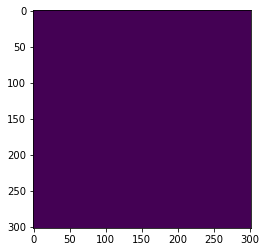

In [56]:
plt.imshow(im)

In [51]:
dataset[index]['raster'].tags()

{'TIFFTAG_RESOLUTIONUNIT': '2 (pixels/inch)',
 'TIFFTAG_XRESOLUTION': '96',
 'TIFFTAG_YRESOLUTION': '96'}